# Линейная алгебра. Лабораторная работа 1, осень 2022


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

In [1]:
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [3]:
z = np.zeros((3,4))
print(z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
d = np.diag(range(1,6))
print(d)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [5]:
tr = d.trace()
tr

15

In [6]:
d_obr = sla.inv(d)
print(d_obr)

[[ 1.          0.          0.          0.         -0.        ]
 [ 0.          0.5         0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [7]:
X = np.random.rand(4,5)
print(X)

[[0.89055356 0.23789848 0.36474623 0.94057817 0.3731245 ]
 [0.13621258 0.76278026 0.29356032 0.90214188 0.6069307 ]
 [0.83092632 0.27338657 0.64822029 0.63534245 0.250297  ]
 [0.9535392  0.11653224 0.09248804 0.36887545 0.8199344 ]]


In [8]:
X_1 = X[np.ix_([1,2], [0,1])]
sla.det(X_1)

-0.5965755029302099

In [9]:
print(X.T @ X)

[[2.41131507 0.65404376 0.99162692 1.84017827 1.4047769 ]
 [0.65404376 0.72674939 0.49868715 1.12857811 0.71569714]
 [0.99162692 0.49868715 0.64796105 1.05386383 0.55234824]
 [1.84017827 1.12857811 1.05386383 2.23827639 1.35996834]
 [1.4047769  0.71569714 0.55234824 1.35996834 1.24252777]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [10]:
def my_det(X):
    if X.shape[0] != X.shape[1]:
        raise ValueError
    A = X.copy()
    det = 1
    n = X.shape[1]
    for i in range(n):
        if A[i][i] == 0:
            for j in range(i + 1, n):
                if A[j][i] != 0:
                    A[i], A[j] = A[j], A[i].copy()
                    det *= -1
                    break
        for k in range(i):
            if A[i][k] != 0:
                a = A[i][k] 
                b = A[k][k]
                for l in range(n):
                    A[i][l] -= A[k][l] * (a / b)
    det = det * np.prod(np.diagonal(A))
    return det

Простая проверка:

In [11]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [12]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

FAILED


Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

6.19 µs ± 840 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
257 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
173 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
229 ms ± 676 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
16.4 ms ± 838 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [3]:
A1 = np.array([[1, 0], [10 ** 20, 1]])
B1 = np.array([[10 ** -20, 1], [0, 1 - 10 ** 20]])
A2 = np.array([[1., 0.], [10. ** 20, 1.]])
B2 = np.array([[10. ** -20, 1.], [0., 1. - 10. ** 20]])
Ans1 = A1 @ B1
Ans2 = A2 @ B2
print(Ans1)
print(Ans2)

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Ответы получились разными: можно заметить, что в матрицах Ans1 и Ans2 различаются элементы, расположенные во второй строке второго столбца. $Ans1_{22} = 1$, a $Ans2_{22} = 0.e+00 = 0$. Если перемножить матрицы А и В собственноручно, станет ясно, что матрица Ans1 будет являться правильным ответом, а Ans2 - нет: ${10}^{20} \cdot 1 + 1 \cdot (1 - {10}^{20}) = {10}^{20} - {10}^{20} + 1 = 1$.**

**Таким образом, правильным будет первый ответ.**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [4]:
def my_pascal(dim):
    P = np.ones((dim, dim))
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i][j - 1] + P[i - 1][j]
    return P
# print(my_pascal(5))

Чему равен её определитель? **Строго** поясните свой ответ.

Определитель матрицы Паскаля всегда равен 1. Матрица Паскаля состоит из биномиальных коэффициентов, $P[i][j] = P[i][j - 1] + P[i - 1][j]$. Поэтому, если мы из k-й строчки вычтем k - 1-ю, то все элементы k-й строчки сдвинутся вправо на 1, а элемент $Р[k][0]$ станет равен 0. Поясним: $P[k][i] = P[k - 1][i] + P[k][i - 1]$. Значит, $P[k][i] - P[k - 1][i] = P[k - 1][i] + P[k][i - 1] - P[k - 1][i] = P[k][i - 1]$. При этом $P[k][0] = P[k - 1][0] = 1$, поэтому элемент $P[k][0] = 0$. Стоит отметить, что такое элементарное преобразование не меняет определитель матрицы. Такие элментарные преобразования мы можем повторять до тех пор, пока в k-й строке все элементы до $P[k][k]$ не обнулятся (понятно, что у нас получится это сделать, т.к. после выполнения алгоритма все строчки сдвинутся направо, еще направо и т.д.). Ясно, что получится верхнетреугольная матрица с единицами на главной диагонали (т.к. элементы сдвигаются вправо, а в исходной матрице Паскаля все левые элементы равны 1). Итак, определитель верхнетреугольной матрицы равен произведению диагональных элементов, каждый из которых равен 1 $\Rightarrow$ det P = 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [5]:
A = sla.pascal(30)
print(sla.det(A))
B = my_pascal(30)
print(sla.det(B))

-7.109158315046981e+49
-7.109158315046981e+49


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [6]:
def prod_and_sq_sum(A):
    a = np.diagonal(A)
    prod = np.prod(a)
    sq_sum = np.sum(a ** 2)
    return (prod, sq_sum)
# print(prod_and_sq_sum(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])))

**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [7]:
def f(A, B, lmbd, k):
    n = A.shape[1]
    l = min(k, n)
    ans = 0
    for i in range(l):
        a = A[:,i]
        b = B[:,i]
        ans += lmbd[i] * a.reshape((n,1)) * b.reshape((1,n))
    return ans
# print(f(np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]), np.array([[1, 1, 1], [1, 1, 1], [2, 2, 2]]), [1,2,3], 5))

**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [8]:
def get_diag(A, B):
    n = A.shape[0]
    a = []
    for i in range(n):
        s = 0
        for j in range(n):
            s += A[i][j] * B[j][i]
        a.append(s)
    w = np.array(a)
    return w

# print(get_diag(np.array([[1, 1, 1], [1, 1, 1], [2, 2, 10]]), np.array([[1, 1, 1], [1, 7, 1], [2, 2, 2]])))

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [9]:
def shrink_rotate(x, a, coef=1., angle=0.):
    x_x = x.real
    x_y = x.imag
    a_x = a.real
    a_y = a.imag
    v_x = coef * (x_x - a_x)
    v_y = coef * (x_y - a_y)
    ans_x = v_x * np.cos(angle) - v_y * np.sin(angle)
    ans_y = v_x * np.sin(angle) + v_y * np.cos(angle)
    return a + ans_x + ans_y * 1j
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    x_x = x.real
    x_y = x.imag
    a_x = a.real
    a_y = a.imag
    v_x = coef * (x_x - a_x)
    v_y = coef * (x_y - a_y)
    ans_x = v_x * np.cos(angle) - v_y * np.sin(angle)
    ans_y = v_x * np.sin(angle) + v_y * np.cos(angle)
    return a + ans_x - ans_y * 1j
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    x_x = x.real
    x_y = x.imag
    a_x = a.real
    a_y = a.imag
    v_x = x_x - a_x
    v_y = x_y - a_y
    ans = r ** 2 / (v_x - v_y * 1j)
    return a + ans

**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

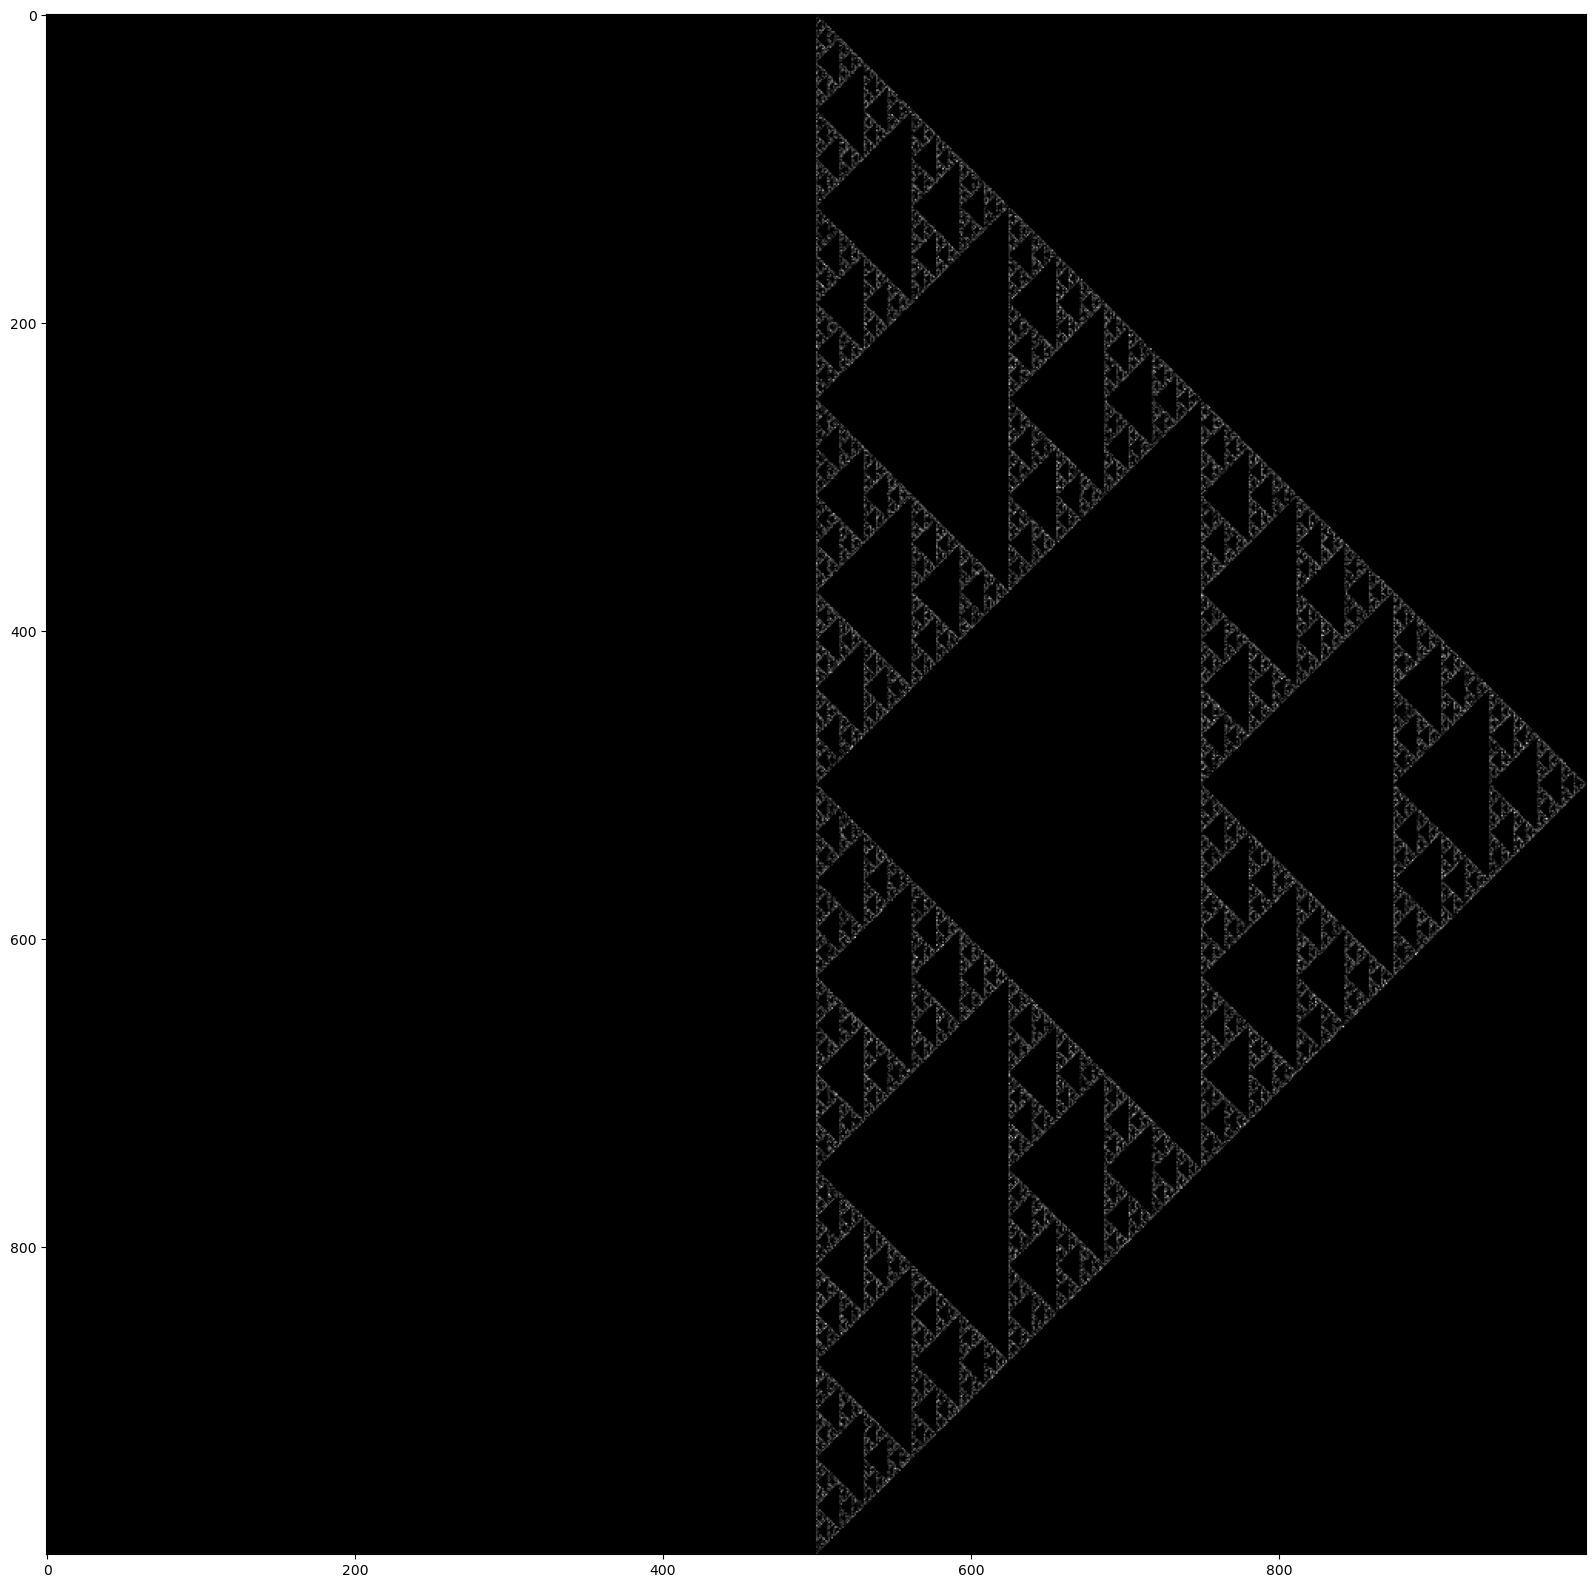

In [10]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
matrix = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        matrix[int(z.real * 500 + 500)][int(z.imag * 500 + 500)] += 1
plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Заметим, что с помощью генератора мы выбираем одну из трех функций, поэтому образовывающийся фрактал состоит из трех частей (каждый следующий, то есть больший треугольник, состоит из трех предыдущих, то есть меньших). В следующем примере, где генератор "выбирает" одну из четырех функций, фрактал состоит из 4 частей: каждый следующий, то есть больший квадрат, состоит из четырех предыдущих, то есть меньших.

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

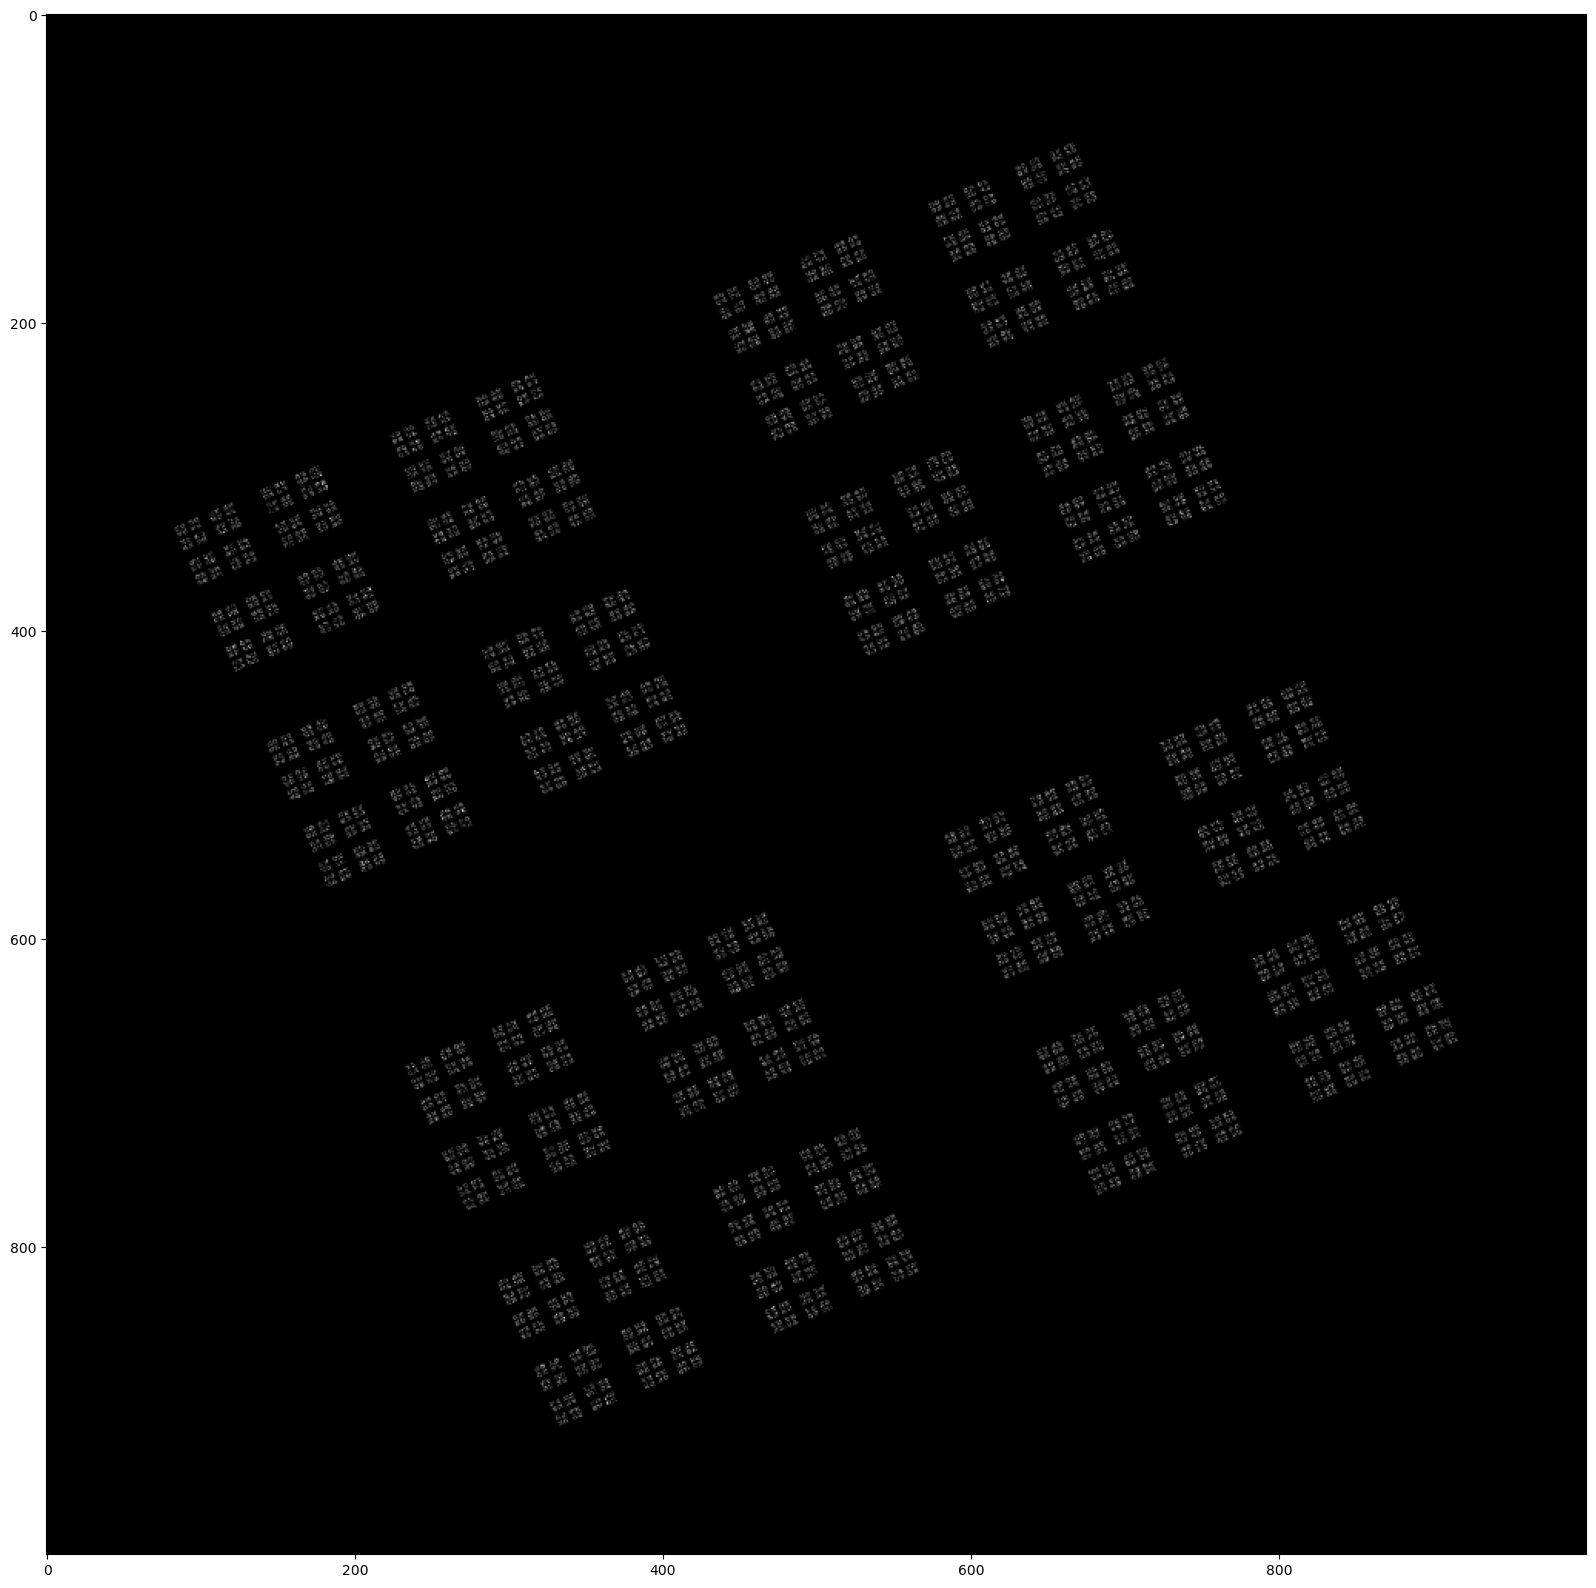

In [11]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0.5 + 0.*1j, coef=0.4, angle=np.pi/2)),
    (lambda t: shrink_rotate(t, -0.5 + 0.*1j, coef=0.4, angle=np.pi/2)),
    (lambda t: shrink_rotate(t, 0. + 0.5*1j, coef=0.4, angle=np.pi/2)),
    (lambda t: shrink_rotate(t, 0. - 0.5*1j, coef=0.4, angle=np.pi/2)),
]
matrix = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        matrix[int(z.real * 500 + 500)][int(z.imag * 500 + 500)] += 1
plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray')